In [1]:
# Initialize Otter
import otter
grader = otter.Notebook()

# Lab 13: Principal Component Analysis

In this lab assignment, we will walk through an example of using Principal Component Analysis (PCA) on a dataset involving [iris plants](https://en.wikipedia.org/wiki/Iris_(plant)).


### Due Date

This assignment is due at **Tuesday, August 4th** at **11:59 pm PST**.

### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about this assignment, we ask that you **write your solutions individually**. If you discuss the assignment with others, please **include their names** in the cell below.

**Collaborators:** *list names here*

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

To begin, run the following cell to load the dataset into this notebook. 
* `iris_features` will contain a numpy array of 4 attributes for 150 different plants (shape 150 x 4). 
* `iris_target` will contain the class of each plant. There are 3 classes of plants in the dataset: Iris-Setosa, Iris-Versicolour, and Iris-Virginica. The class names will be stored in `iris_target_names`.
* `iris_feature_names` will be a list of 4 names, one for each attribute in `iris_features`. 

Additional information on the dataset will be included in the description printed at the end of the following cell.

In [12]:
from sklearn.datasets import load_iris
iris_data = load_iris() # Loading the dataset

# Unpacking the data into arrays
iris_features = iris_data['data']
iris_target = iris_data['target']
iris_feature_names = iris_data['feature_names']
iris_target_names = iris_data['target_names']

# Convert iris_target to string labels instead of int labels currently (0, 1, 2) for the classes
iris_target = iris_target_names[iris_target]

## Question 1

Let's explore the data by creating a scatter matrix of our iris features. To do this, we'll create 2D scatter plots for every possible pair of our four features. This should result in six total scatter plots in our scatter matrix.

Complete the code below using `sns.scatterplot` to create the scatter matrix.

**Hint:** Use the `hue` argument of `sns.scatterplot` to color the points by class. A legend should then appear in each scatter plot automatically.

<!--
BEGIN QUESTION
name: q1
-->

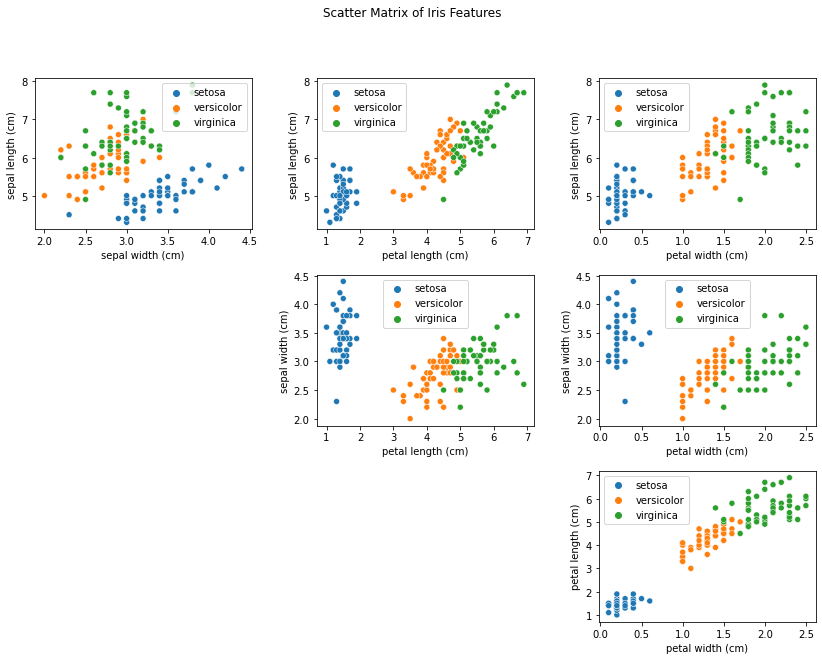

In [17]:
plt.figure(figsize=(14, 10))
plt.suptitle("Scatter Matrix of Iris Features")
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for i in range(1, 4):
    for j in range(i):
        plt.subplot(3, 3, i+3*j)
        sns.scatterplot(x = iris_features[:, i], y = iris_features[:, j], hue = iris_target)
        plt.xlabel(iris_feature_names[i])
        plt.ylabel(iris_feature_names[j])

## Question 2a

To apply PCA, we will first need to "center" the data so that the mean of each feature is 0. 

Compute the columnwise mean of `iris_features` in the cell below and store it in `iris_mean` (should be a numpy array of 4 means, 1 for each attribute). Then, subtract `iris_mean` from `iris_features`, and save the result in `features`.

**Hints:** 
* Use `np.mean` or `np.average` to compute `iris_mean`, and pay attention to the `axis` argument.
* If you are confused about how numpy deals with arithmetic operations between arrays of different shapes, see this note about [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) for explanations/examples.

<!--
BEGIN QUESTION
name: q2a
-->

In [26]:
iris_mean = np.mean(iris_features, axis = 0)
features = iris_features - iris_mean
iris_mean

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [27]:
grader.check("q2a")

q2a results: All test cases passed!

## Question 2b

As you may recall from lecture, PCA is a specific application of the singular value decomposition (SVD) for matrices. In the following cell, let's use the [`np.linalg.svd`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) function to compute the SVD of our `features`. Store the left singular vectors, singular values, and right singular vectors in `u`, `s`, and `vt`, respectively.

**Hint:** Set the `full_matrices` argument of `np.linalg.svd` to `False`.

<!--
BEGIN QUESTION
name: q2b
-->

In [36]:
u, s, vt = np.linalg.svd(features, full_matrices=False)
u.shape, s, vt.shape

((150, 4), array([25.09996044,  6.01314738,  3.41368064,  1.88452351]), (4, 4))

In [37]:
grader.check("q2b")

q2b results: All test cases passed!

## Question 2c

What can we learn from the singular values in `s`? First, we can compute the total variance of the data by summing the squared singular values. We will later be able to use this value to determine the variance captured by a subset of our principal components.

Compute the total variance below by summing the square of `s` and store the result in the variable `total_variance`.

<!--
BEGIN QUESTION
name: q2c
-->

In [44]:
total_variance = np.sum(s**2) / len(iris_features)
print("total_variance: {:.3f} should approximately equal the sum of the feature variances: {:.3f}"
      .format(total_variance, np.sum(np.var(iris_features, axis=0))))

total_variance: 4.542 should approximately equal the sum of the feature variances: 4.542


In [45]:
grader.check("q2c")

q2c results: All test cases passed!

As you can see, `total_variance` is equal to the sum of the feature variances.

## Question 3a

Let's now use only the first two principal components to see what a 2D version of our iris data looks like.

First, construct the 2D version of the iris data by matrix-multiplying our `features` by the first two right singular vectors in `v`. Because the first two right singular vectors are directions for the first two principal components, this will project the iris data down from a 4D subspace to a 2D subspace.

**Hints:**
* To matrix-multiply two numpy arrays, use @ or np.dot.
* The first two right singular vectors in `v` will be the first two columns of `v`, or the first two rows of `vt` (transposed to be column vectors instead of row vectors). 
* Since we want to obtain a 2D version of our iris dataset, the shape of `iris_2d` should be (150, 2).

<!--
BEGIN QUESTION
name: q3a
-->

In [46]:
iris_2d = features @ vt[:2,:].T
np.sum(iris_2d[0])

-3.0035228725546372

In [47]:
grader.check("q3a")

q3a results: All test cases passed!

Now, run the cell below to create the scatter plot of our 2D version of the iris data, `iris_2d`.

/Users/huangweijun/anaconda/envs/cs188/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


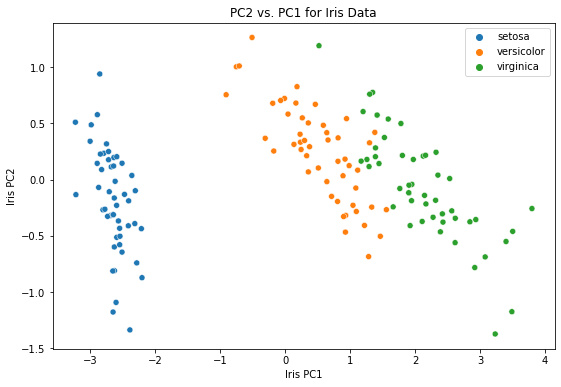

In [48]:
plt.figure(figsize=(9, 6))
plt.title("PC2 vs. PC1 for Iris Data")
plt.xlabel("Iris PC1")
plt.ylabel("Iris PC2")
sns.scatterplot(iris_2d[:, 0], iris_2d[:, 1], hue=iris_target);

## Question 3b

What do you observe about the plot above? If you were given a point in the subspace defined by PC1 and PC2, how well would you be able to classify the point as one of the three iris types?

<!--
BEGIN QUESTION
name: q3b
-->

_Type your answer here, replacing this text._

## Question 3c

What proportion of the total variance is accounted for when we project the iris data down to two dimensions? Compute this quantity in the cell below by dividing the sum of the first two squared singular values (also known as component scores) in `s` by the `total_variance` you calculated previously. Store the result in `two_dim_variance`.

<!--
BEGIN QUESTION
name: q3c
-->

In [49]:
two_dim_variance = (np.sum(s[:2] ** 2) / features.shape[0]) / total_variance
two_dim_variance

0.9776852063187949

In [ ]:
grader.check("q3c")

Most of the variance in the data is explained by the two-dimensional projection!

## Question 4

As a last step, let's create a [scree plot](https://en.wikipedia.org/wiki/Scree_plot) to visualize the weight of each principal component. In the cell below, create a scree plot by plotting a line plot of the square of the singular values in `s` vs. the principal component number (1st, 2nd, 3rd, or 4th).

<img src="scree.png" width="400px" />

<!--
BEGIN QUESTION
name: q4
-->

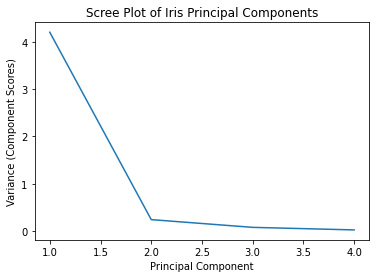

In [50]:
plt.ylabel("Variance (Component Scores)")
plt.xlabel("Principal Component")
plt.title("Scree Plot of Iris Principal Components")
plt.plot(range(1, 5), s**2/len(iris_features));

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [51]:
grader.check_all()

q2a results: All test cases passed!

q2b results: All test cases passed!

q2c results: All test cases passed!

q3a results: All test cases passed!

q3c results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before     running the cell below, so that all images/graphs appear in the output. The cell below will generate     a zipfile for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)